In [24]:
from methods_fromhome import *
import geopandas as gpd
from shapely.geometry import LinearRing
from shapely.geometry import LineString

In [25]:
def getExtrapoledLine(p1,p2):
    'Creates a line extrapoled in p1->p2 direction'
    EXTRAPOL_RATIO = 10
    a = p1
    b = (p1[0]+EXTRAPOL_RATIO*(p2[0]-p1[0]), p1[1]+EXTRAPOL_RATIO*(p2[1]-p1[1]) )
    return LineString([a,b])

In [10]:
bfe = gpd.read_file('bfe_mre_all_poc2.shp')
fsp = gpd.read_file('fsp_2.shp')

# Reproject files to UTM
bfe.to_crs(26913, inplace=True)
bfe = bfe[['ELEV', 'geometry']]

fsp.to_crs(26913, inplace=True)
fsp = fsp[['geometry']]
fsp.reset_index(inplace=True)

In [11]:
bfe = bfe.iloc[198]


In [12]:
bfe

ELEV                                                    546.0
geometry    LINESTRING (1267200.0598928416 3636397.6547400...
Name: 198, dtype: object

In [20]:
fsp_ext = fsp.geometry.exterior[0]

In [22]:
l_coords = list(bfe.geometry.coords)

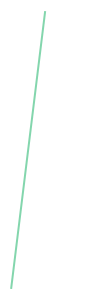

In [26]:
ext_line = getExtrapoledLine(*l_coords[-2:])
ext_line

In [27]:
df = g(ext_line, 26913)
df.to_file('ext_line.shp')

In [28]:
if fsp_ext.intersects(ext_line):
    pts = fsp_ext.intersection(ext_line)
    npts = list(pts.coords)[0]
else:
    print('Problem')

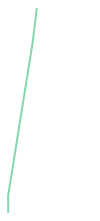

In [29]:
l_coords.append(npts)
nline = LineString(l_coords)
nline

In [30]:
ndf = g(nline, 26913)
ndf.to_file('new_line.shp')